<a href="https://colab.research.google.com/github/zronyj/fisicoquimica/blob/master/Cuantica/Funci%C3%B3n_de_Onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¡Te volvemos a dar la bienvenida a otro cuaderno interactivo de Colaboratory!

En esta ocasión vamos a estudiar los modelos de la partícula en una caja y el oscilador armónico para mecánica cuántica. Para ello vamos a revisar qué sucede cuando el modelo no está solo en una dimensión, y vamos a trabajar con un caso experimental.

Primero, vamos a importar las librerías necesarias.

In [0]:
%matplotlib inline
import numpy as np
from matplotlib import cm
import scipy.special as spe
import scipy.constants as ctes
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

## Partícula en una Caja en 1D

Dado que ya conocemos la función de onda de la partícula en una caja, vamos a graficarla y probar visualizar qué sucede al alterar los números cuánticos.

$$ \psi \left( x \right) = \sqrt{ \frac{2}{L} } \sin \left( \frac{n \pi x}{L} \right)$$

¡Recordemos que debemos definir el largo de la caja también!

In [0]:
def Psi_pib(x, n=1, L=1):
  B = np.sqrt(2./L)
  k = n * np.pi / L
  return B * np.sin(k * x)

Ahora vamos a proceder a graficar la función de onda. $n$ puede variarse de 1 a 20 sin perder nitidez en la imagen según este código. $L$ puede variarse de la misma manera, aunque hacer $L$ muy grande solo hace que la función de onda elevada al cuadrado posea valores muy pequeños.

En este momento es importante recordar que la función de onda no tiene sentido al no elevarla al cuadrado. Sin embargo, observar su comportamiento normal ya nos da una idea sobre su forma.

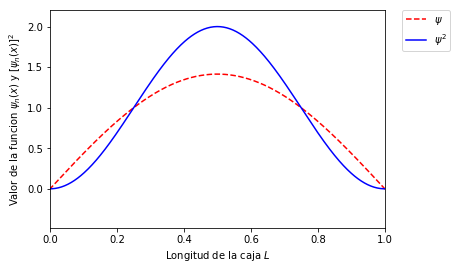

In [3]:
n = 1 # Cambiar "n" aqui
L = 1 # Cambiar "L" aqui
x = np.linspace(-L*0.1, L*1.1, 500)
psi_pib = np.vectorize(Psi_pib)
y1 = psi_pib(x, n, L) # psi
y2 = psi_pib(x, n, L)**2 # psi**2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y1, 'r--', label="$\psi$")
ax.plot(x, y2, 'b-', label="$\psi^2$")
ax.set_xlim(0, L)
ax.set_ylim(min(y1.min(), y2.min())*1.1, max(y1.max(), y2.max())*1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Longitud de la caja $L$')
plt.ylabel('Valor de la funcion $\psi_{n} (x)$ y $[ \psi_{n} (x) ]^{2}$')
plt.show()

## Partícula en una Caja en 2D

Al pensar en la partícula en una caja, usualmente se piensa en una caja cuadrada. Este caso es relativamente fácil de resolver. Sin embargo, si la caja no fuese cuadrada ¿qué podría suceder? Resolver la ecuación de Schrödinger para casos así han resultado ser ejercicios interesantes y que ofrecen explicaciones a muchos otros fenómenos.

### Caja cuadrada

Lograr modelar la partícula en una caja en 2D no requiere volver a resolver la ecuación de Schrödinger necesariamente. Lo único que se requiere es recordar que la función de onda puede tomarse como el producto de varias funciones de onda que modelan diferentes casos. Para nuestra ventaja, ya tenemos la forma de $\psi$ en una dimensión. Lo que podría hacerse es tomarse un producto cartesiano de la función para construir la caja en 2D.

$$\psi_{n,m} \left( x, y \right) = \psi_{n} \left( x \right) \times  \psi_{m} \left( y \right) = \frac{2}{ \sqrt{ L_{1} L_{2} } } \sin \left( \frac{n \pi x}{L_{1}} \right) \sin \left( \frac{m \pi y}{L_{2}} \right)$$

Al ya conocer la función de onda, lo único que queda es graficarla. Esta vez debemos tener más cuidado con el tamaño de la caja, pues ya no contamos con un solo $L$! Comenzamos definiendo la función para graficar.

In [0]:
def PIB2D(n=1, m=1, L1=1, L2=1):
  vx = np.linspace(0, L1, 300)
  vy = np.linspace(0, L2, 300)
  X, Y = np.meshgrid(vx, vy)
  psi = np.vectorize(Psi_pib)
  Z1 = psi(X, n, L1) * psi(Y, m, L2)
  Z2 = (psi(X, n, L1) * psi(Y, m, L2))**2
  fig = plt.figure(figsize=(12,12))
  # Mapa de calor de la funcion de onda
  a1 = fig.add_subplot(221)
  a1.imshow(Z1, extent=[0, L1, 0, L2], origin='lower', cmap=cm.rainbow)
  a1.set_xlim(0, L1)
  a1.set_ylim(0, L2)
  a1.set_aspect('equal')
  a1.set_axis_off()
  # Superficie segun la funcion de onda
  a2 = fig.add_subplot(222, projection='3d')
  a2.plot_surface(X, Y, Z1, cmap=cm.rainbow, rstride=2, cstride=2, linewidth=0, antialiased=False)
  a2.set_xlim(0, L1)
  a2.set_ylim(0, L2)
  a2.set_zlim(Z1.min() - abs(Z1.min()) * 0.1, Z1.max() + abs(Z1.max()) * 0.1)
  # Mapa de calor de la funcion de onda
  a3 = fig.add_subplot(223)
  a3.imshow(Z2, extent=[0, L1, 0, L2], origin='lower', cmap=cm.viridis)
  a3.set_xlim(0, L1)
  a3.set_ylim(0, L2)
  a3.set_aspect('equal')
  a3.set_axis_off()
  # Superficie segun la funcion de onda
  a4 = fig.add_subplot(224, projection='3d')
  a4.plot_surface(X, Y, Z2, cmap=cm.viridis, rstride=2, cstride=2, linewidth=0, antialiased=False)
  a4.set_xlim(0, L1)
  a4.set_ylim(0, L2)
  a4.set_zlim(Z2.min() - abs(Z2.min()) * 0.1, Z2.max() + abs(Z2.max()) * 0.1)
  plt.show()

Ahora procedemos a hacer las gráficas. Esta vez haremos 2 tipos de gráficas para apreciar y entender mejor lo que está sucediendo.

* El primer tipo de gráfica es un mapa de calor. Este nos dirá, utilizando colores, el valor de la función de onda en cada punto de la caja. 
* El segundo tipo de gráfica es una superficie. Esta no solo utilizará los colores que vimos en la primera gráfica, sino también representará el valor de la función de onda como una altura en el eje $z$ de coordenadas en 3D.

A continuación vamos, entonces, a graficar la función de onda $\psi$ y al mismo tiempo, pero en otras gráficas, la función de onda $\psi^2$. Podemos variar los números $n$ y $m$ de 0 a 5 para apreciar bien el efecto de cambiar cada uno por separado. La longitud de la caja, a pesar de que se puede variar, no es recomendable hacerlo en este caso, pues se pierde un poco la forma de la función (como ya se vio anteriormente) y cuesta más la interpretación.

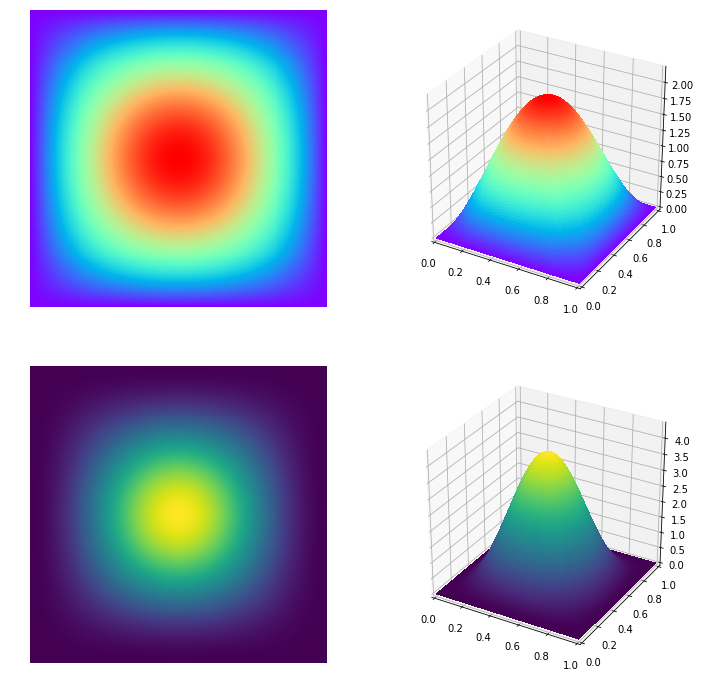

In [5]:
PIB2D(n=1,m=1)

### Caja redonda

Este caso no es tan común de resolver. La función de onda resulta de resolver la ecuación de Schrödinger para una caja redonda (algo como un vaso). Para ello, el primer paso es plantear la ecuación en coordenadas polares. Este cambio de coordenadas es otro buen ejercicio para realizar a mano, pero no se verá aquí. La ecuación de Schrödinger se ve entonces de la siguiente manera.

$$\hat{H}\ \psi = - \frac{\hbar^2}{2m} \left( \dfrac{\partial^2}{\partial r^2} + \frac{1}{r} \dfrac{\partial}{\partial r} + \frac{1}{r^2} \dfrac{\partial^2}{\partial \theta^2} \right) \psi = E\ \psi$$

Resolver esta ecuación diferencial ya representa un reto para muchos. Como referencias se pueden revisar [este](https://www.researchgate.net/publication/326835286_The_right_way_to_solve_the_infinite_circular_well_in_quantum_mechanics) o [este](https://opencommons.uconn.edu/chem_educ/12/) artículos. Basta decir que se necesita realizar una separación de variables (de la que aparece un número cuántico) y se resulta teniendo dos funciones de onda: la radial y la angular. La función de onda radial es una función de Bessel y la angular es una exponencial compleja. Al aplicar condiciones en la frontera a cada una se llega a las siguientes expresiones:

**Función radial**
$$R_{n, m} \left( r \right) = N_{n,m}\ J_{n} \left( \frac{r}{L} \cdot \left[ J_{n} = 0 \right]_{m} \right)$$

**Función angular**
$$S_{n} \left( \theta \right) = \frac{1}{ \sqrt{2 \pi} } e^{ i n \theta }$$

Aquí $r$ es el radio de la función de onda, $L$ es el radio de la caja, $\theta$ es el ángulo $n$ es un número cuántico, $J_{n}$ es la función de Bessel, $\left[ J_{n} = 0 \right]_{m}$ es la $m$-ava raíz de la función de Bessel y $N_{n,m}$ es una constante de normalización.

Ahora vamos a definir la función de onda, y la función de graficado.

In [0]:
def Psi_c(x, y, n=0, m=1, L=1):
  r = np.sqrt(x**2 + y**2) # Cambio de coordenadas: r
  t = np.arctan(y/x) * 2 # Cambio de coordenadas: theta
  R = spe.jv(n, r * spe.jn_zeros(n, m)[m-1]/L) # Funcion de Bessel J_n
  S = 1/np.sqrt(2 * np.pi) * np.exp((1.j * n * t)/L) # Funcion angular
  return R * S

# Constante de normalizacion de la funcion radial
def normalizacion(n=0, m=1, L=1):
  cte = np.sqrt(2) / L
  b2 = spe.jv(n, spe.jn_zeros(n, m)[m-1])**2
  bm1 = spe.jv(n-1, spe.jn_zeros(n, m)[m-1])
  bp1 = spe.jv(n+1, spe.jn_zeros(n, m)[m-1])
  return cte / np.sqrt(b2 - bm1 * bp1)
  

Un par de cosas es bueno notar en la anterior función:
* Dado que en este cuaderno solo se puede graficar en *x* y *y*, debemos hacer algunos cambios de coordenadas.
* $n$ en este caso puede comenzar en 0, y puede tomar valores negativos
* $m$ en este caso comienza en 1, pues lo que se está escogiendo es hasta qué raíz de la función de Bessel es que se encontrará el límite de la caja
* La función de Bessel utilizada como función de onda radial depende de encontrar una raíz (i.e. un *cero*) de la misma función para definir las condiciones en la frontera.

In [0]:
def PIC2D(n=0, m=1, L=1):
  vec = np.linspace(-L, L, 300)
  X, Y = np.meshgrid(vec, vec)
  psi = np.vectorize(Psi_c)
  N = normalizacion(n, m, L)
  Z1 = N * np.real(psi(X, Y, n, m, L))
  Z2 = N**2 * np.real(psi(X, Y, n, m, L))**2
  fig = plt.figure(figsize=(12, 12))
  a1 = fig.add_subplot(221)
  a1.imshow(Z1, extent=[-L, L, -L, L], origin='lower', cmap=cm.rainbow)
  a1.set_xlim(-L, L)
  a1.set_ylim(-L, L)
  a1.set_aspect('equal')
  a1.set_axis_off()
  # Superficie segun la funcion de onda
  a2 = fig.add_subplot(222, projection='3d')
  a2.plot_surface(X, Y, Z1, cmap=cm.rainbow, rstride=2, cstride=2, linewidth=0, antialiased=False)
  a2.set_xlim(-L, L)
  a2.set_ylim(-L, L)
  a2.set_zlim(Z1.min() - abs(Z1.min()) * 0.1, Z1.max() + abs(Z1.max()) * 0.1)
  # Mapa de calor de la funcion de onda
  a3 = fig.add_subplot(223)
  a3.imshow(Z2, extent=[-L, L, -L, L], origin='lower', cmap=cm.viridis)
  a3.set_xlim(-L, L)
  a3.set_ylim(-L, L)
  a3.set_aspect('equal')
  a3.set_axis_off()
  # Superficie segun la funcion de onda
  a4 = fig.add_subplot(224, projection='3d')
  a4.plot_surface(X, Y, Z2, cmap=cm.viridis, rstride=2, cstride=2, linewidth=0, antialiased=False)
  a4.set_xlim(-L, L)
  a4.set_ylim(-L, L)
  a4.set_zlim(Z2.min() - abs(Z2.min()) * 0.1, Z2.max() + abs(Z2.max()) * 0.1)
  plt.show()

Procediendo a graficar, vamos a utilizar un método igual al utilizado con la función de onda pasada para poder así comparar la forma y diferencias. Se recomienda variar los valores de $n$ de 0 a 7 para conservar la forma de la función lo suficiente como para poder analizarla, y los valores de $m$ de 1 a 4 para no incluir tantas oscilaciones dentro de la caja.

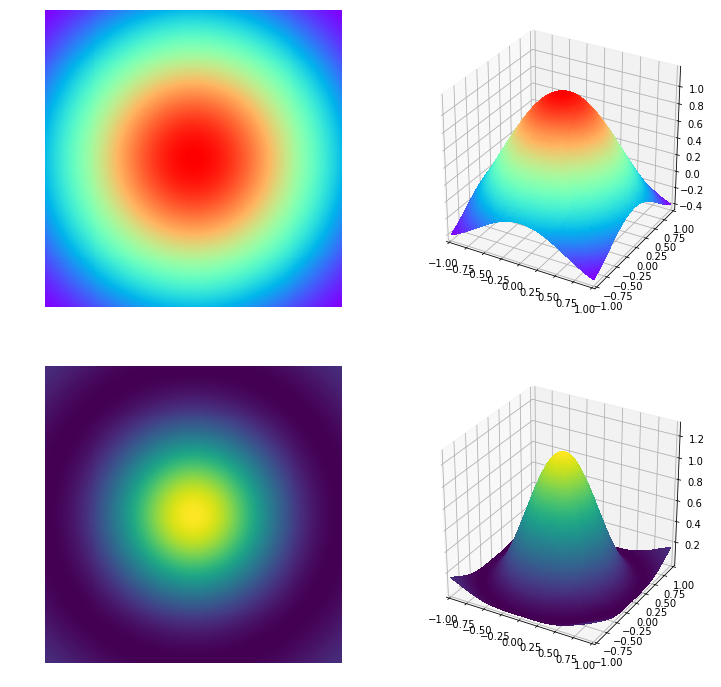

In [8]:
PIC2D(n=0, m=1, L=1)

## Oscilador Armónico en 1D

Otro modelo que ya hemos estudiado en la teoría es el oscilador armónico. Este nos recuerda mucho al movimiento de un resorte acoplado a una masa. La función de onda ya la hemos visto también y solo queda recordarla.

$$\psi_{n} \left( x \right) = \frac{1}{ \sqrt{2^{n}\ n!} } \left( \frac{m \omega}{\pi \hbar} \right)^{1/4} e^{- \frac{m \omega}{2 \hbar} x^2} H_{n} \left( \sqrt{ \frac{m \omega}{\hbar} } x \right),\ \ \ \ n = 0, 1, 2, ...$$

En donde $H_{n}$ es un polinomio de Hermite evaluado con $\sqrt{ \frac{m \omega}{\hbar} } x$. Ahora, dado que estamos usando un factorial, debemos comenzar definiendo eso antes de la función de onda.

In [0]:
factorial = lambda n: np.prod( np.array( [i for i in range(1,n)] ) )

Luego procedemos con la función de onda. Vale la pena mencionar que esta se definirá utilizando frecuencia $\nu$ en vez de frecuencia angular $\omega$. Recordemos que $\nu = 2 \pi \omega$, por lo que la función de onda es la siguiente:

In [0]:
def Psi_ho(x, n = 1, f = 0.015, m = ctes.m_e):
    omega = 2 * np.pi * f
    a = m * omega / ctes.hbar
    y = a**0.5 * x
    cts = (a / np.pi)**0.25 * 1 / (2**n * factorial(n))**0.5
    poly_herm = spe.eval_hermite(n, y)
    return cts * poly_herm * np.exp(-y**2 / 2)

Ahora vamos a graficar la función de onda al igual que hicimos con el caso de la partícula en una caja. Para ello vamos a definir una función.

In [0]:
def orbital(n = 0, f = 0.015, m = ctes.m_e, d = [-0.2, 0.2, 0.0001]):
    x = np.arange(d[0], d[1], d[2])
    vf = np.vectorize(Psi_ho)
    y = vf(x, n=n, f=f, m=m)
    y2 = vf(x, n=n, f=f, m=m)**2
    plt.title("Funcion de onda del oscilador armonico")
    plt.plot(x, y, "r--", label="$\Psi$")
    plt.plot(x, y2, "b-", label="$\Psi^2$")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.grid(True)
    plt.show()

A pesar de la función está definida para poder utilizar cualquier $n$ y diferentes $\nu$ (que en código representamos con `f`), se recomienda utilizar un $n$ de 0 a 10 y dejar a `f` en el mismo valor para apreciar bien la función de onda.

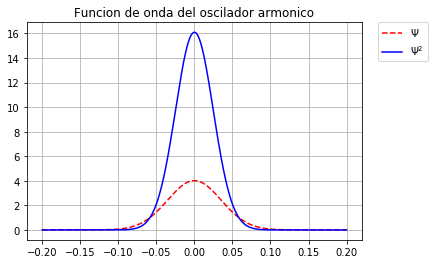

In [12]:
orbital(n=0)

## Oscilador Armónico en 2D

Habiendo ya estudiado el caso en 1 dimensión, ahora pasaremos al caso en 2 dimensiones. Este puede estudiarse igual que en el caso de la partícula en una caja: como el producto de dos funciones de onda en 1D o definiendo el problema en coordenadas polares y resolviendo la ecuación de Schrödinger para ese caso.

### Oscilador cuadrado

Este es el caso más sencillo. La función de onda en 2D se define como el producto de 2 funciones en 1D.

$$\psi_{n_x, n_y} = \psi_{n_x} \times \psi_{n_y} = \frac{1}{\sqrt{2^{n_x+n_y}\ n_x!\ n_y!} } \left( \frac{m \omega}{\pi \hbar} \right)^{1/2} e^{- \frac{m \omega}{2 \hbar} \left(x^2 + y^2\right)} H_{n_x} \left( \sqrt{ \frac{m \omega}{\hbar} } x \right) H_{n_y} \left( \sqrt{ \frac{m \omega}{\hbar} } y \right)$$

Como era de esperarse, ahora se cuenta con dos números cuánticos: $n_x$ y $n_y$. Para comprender mejor cómo se comporta esta función de onda, vamos a graficarla. Comenzamos definiendo una función.

In [0]:
def HO2D(nx = 1, ny=1, fx = 0.015, fy = 0.015, me = ctes.m_e, d = [-0.1, 0.1, 300]):
  vx = np.linspace(d[0], d[1], d[2])
  vy = np.linspace(d[0], d[1], d[2])
  X, Y = np.meshgrid(vx, vy)
  psi = np.vectorize(Psi_ho)
  Z1 = psi(X, n=nx, f=fx, m=me) * psi(Y, n=ny, f=fy, m=me)
  Z2 = (psi(X, n=nx, f=fx, m=me) * psi(Y, n=ny, f=fy, m=me))**2
  fig = plt.figure(figsize=(12,12))
  # Mapa de calor de la funcion de onda
  a1 = fig.add_subplot(221)
  a1.imshow(Z1, extent=[d[0], d[1], d[0], d[1]], origin='lower', cmap=cm.rainbow)
  a1.set_xlim(d[0], d[1])
  a1.set_ylim(d[0], d[1])
  a1.set_aspect('equal')
  a1.set_axis_off()
  # Superficie segun la funcion de onda
  a2 = fig.add_subplot(222, projection='3d')
  a2.plot_surface(X, Y, Z1, cmap=cm.rainbow, rstride=2, cstride=2, linewidth=0, antialiased=False)
  a2.set_xlim(d[0], d[1])
  a2.set_ylim(d[0], d[1])
  a2.set_zlim(Z1.min() - abs(Z1.min()) * 0.1, Z1.max() + abs(Z1.max()) * 0.1)
  # Mapa de calor de la funcion de onda
  a3 = fig.add_subplot(223)
  a3.imshow(Z2, extent=[d[0], d[1], d[0], d[1]], origin='lower', cmap=cm.viridis)
  a3.set_xlim(d[0], d[1])
  a3.set_ylim(d[0], d[1])
  a3.set_aspect('equal')
  a3.set_axis_off()
  # Superficie segun la funcion de onda
  a4 = fig.add_subplot(224, projection='3d')
  a4.plot_surface(X, Y, Z2, cmap=cm.viridis, rstride=2, cstride=2, linewidth=0, antialiased=False)
  a4.set_xlim(d[0], d[1])
  a4.set_ylim(d[0], d[1])
  a4.set_zlim(Z2.min() - abs(Z2.min()) * 0.1, Z2.max() + abs(Z2.max()) * 0.1)
  plt.show()

Al igual que en el caso 1D, la función está definida para poder utilizar cualquier $n_{x}$, $n_{y}$ y diferentes `f`. Sin embargo, se recomienda utilizar un $n$ de 0 a 10 y dejar a `f` en el mismo valor para apreciar bien la función de onda.

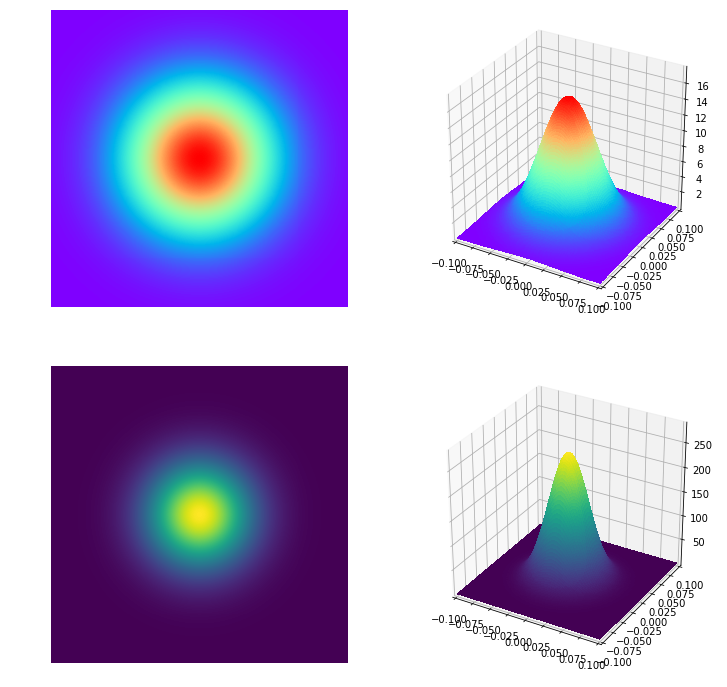

In [14]:
HO2D(nx=0, ny=0)

### Oscilador redondo

Este caso no es nada fácil de resolver. La función de onda resulta de resolver la ecuación de Schrödinger para un oscilador redondo (algo como una membrana). Para ello, el primer paso es plantear la ecuación en coordenadas polares. La ecuación de Schrödinger se ve entonces de la siguiente manera.

$$\hat{H}\ \psi = - \frac{\hbar^2}{2m} \left( \dfrac{\partial^2}{\partial r^2} + \frac{1}{r} \dfrac{\partial}{\partial r} + \frac{1}{r^2} \dfrac{\partial^2}{\partial \theta^2} \right) \psi + \frac{1}{2} k x^2 \psi= E\ \psi$$

Resolver esta ecuación diferencial es un reto para casi cualquiera. Como referencia, se puede revisar [este documento](http://14.139.172.204/nptel/CSE/Web/115101010/downloads/lec5.pdf). Sin embargo, lo fundamental es que se resulta teniendo dos funciones de onda: la radial y la angular. La función de onda radial se compone de una exponencial, una potencia y una función hipergeométrica confluente, mientras que la angular es una exponencial compleja.

**Función radial**
$$R_{n,l} \left( r \right) = e^{- \frac{m \omega}{\hbar} r^2} r^{\left| n \right|} F \left( -l, \left| n \right| + 1, \frac{m \omega}{\hbar} r^2 \right)$$

**Función angular**
$$S_{n} \left( \theta \right) = \frac{1}{ \sqrt{2 \pi} } e^{ i n \theta }$$

Aquí $r$ es el radio de la función de onda, $\omega$ es la frecuencia angular, $\theta$ es el ángulo $n$ y $l$ son números cuánticos y $F$ es la función hipergeométrica confluente.

Ahora vamos a definir la función de onda, y la función de graficado.

In [0]:
def Psi_m(x, y, n=0, l=0, f=0.015, me = ctes.m_e):
  r = np.sqrt(x**2 + y**2) # Cambio de coordenadas: r
  t = np.arctan(y/x) * 2 # Cambio de coordenadas: theta
  arg = me * 2 * np.pi * f * r**2 / ctes.hbar
  R = np.exp(- arg) * r**abs(n) * \
  spe.hyp1f1(-1*l, abs(n) + 1, arg) # Funcion radial
  S = 1/np.sqrt(2 * np.pi) * np.exp(1.j * n * t) # Funcion angular
  return R * S

In [0]:
def HOM2D(n = 1, l=1, f = 0.015, me = ctes.m_e, d = [-0.05, 0.05, 300]):
  vx = np.linspace(d[0], d[1], d[2])
  vy = np.linspace(d[0], d[1], d[2])
  X, Y = np.meshgrid(vx, vy)
  psi = np.vectorize(Psi_m)
  Z1 = np.real(psi(X, Y, n=n, l=l, f=f, me=me))
  Z2 = np.real(psi(X, Y, n=n, l=l, f=f, me=me))**2
  fig = plt.figure(figsize=(12,12))
  # Mapa de calor de la funcion de onda
  a1 = fig.add_subplot(221)
  a1.imshow(Z1, extent=[d[0], d[1], d[0], d[1]], origin='lower', cmap=cm.rainbow)
  a1.set_xlim(d[0], d[1])
  a1.set_ylim(d[0], d[1])
  a1.set_aspect('equal')
  a1.set_axis_off()
  # Superficie segun la funcion de onda
  a2 = fig.add_subplot(222, projection='3d')
  a2.plot_surface(X, Y, Z1, cmap=cm.rainbow, rstride=2, cstride=2, linewidth=0, antialiased=False)
  a2.set_xlim(d[0], d[1])
  a2.set_ylim(d[0], d[1])
  a2.set_zlim(Z1.min() - abs(Z1.min()) * 0.1, Z1.max() + abs(Z1.max()) * 0.1)
  # Mapa de calor de la funcion de onda
  a3 = fig.add_subplot(223)
  a3.imshow(Z2, extent=[d[0], d[1], d[0], d[1]], origin='lower', cmap=cm.viridis)
  a3.set_xlim(d[0], d[1])
  a3.set_ylim(d[0], d[1])
  a3.set_aspect('equal')
  a3.set_axis_off()
  # Superficie segun la funcion de onda
  a4 = fig.add_subplot(224, projection='3d')
  a4.plot_surface(X, Y, Z2, cmap=cm.viridis, rstride=2, cstride=2, linewidth=0, antialiased=False)
  a4.set_xlim(d[0], d[1])
  a4.set_ylim(d[0], d[1])
  a4.set_zlim(Z2.min() - abs(Z2.min()) * 0.1, Z2.max() + abs(Z2.max()) * 0.1)
  plt.show()

Para este caso, se recomienda variar $n$ de 0 a 5 y $l$ de 0 a 30 en intervalos de 5 para apreciar mejor los efectos de los números cuánticos en la función de onda.

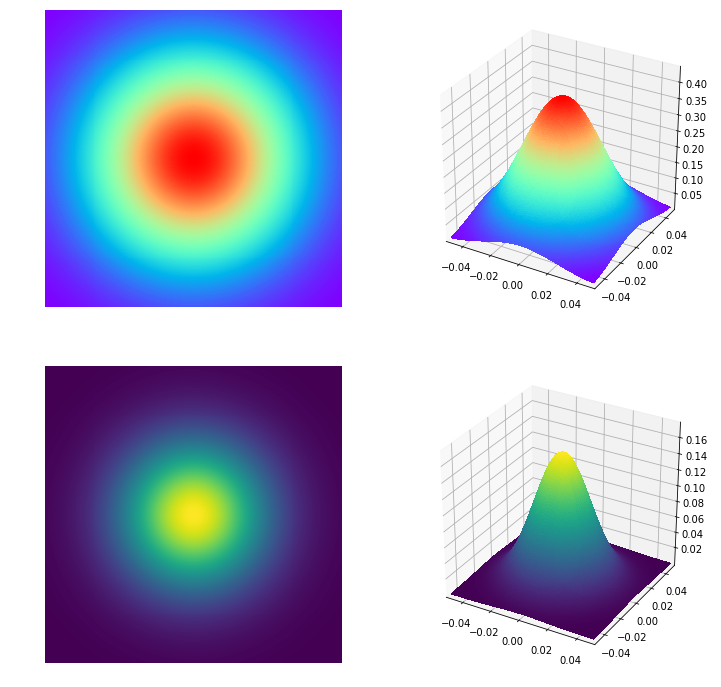

In [17]:
HOM2D(n=0, l=0)

## Aplicaciones

Ahora que ya hemos estudiado las funciones de onda y el efecto de variar los números cuánticos en ellas, intentemos (como ejercicio mental) describir este efecto en una frase.

Si bien estos modelos no tienen tanta aplicación en el mundo de la química, vamos a ver qué aproximaciones se logran con ellos. Para ello vamos a estudiar dos moléculas: un benceno, y un retinol.

### Generar XYZ
Para comenzar, vamos a abrir Agovadro, dibujaremos un benceno y le optimizaremos su geometría utilizando un campo de fuerzas (Force Field) MMFF94. Cuando ya haya convergido este, vamos a guardar esta estructura en formato XYZ como `benceno.xyz`

Ahora haremos lo mismo con el [retinol](https://en.wikipedia.org/wiki/Retinol) guardándolo como `retinol.xyz`

Una vez realizado esto, iremos a donde guardamos estas estructuras y crearemos 2 nuevos documentos te texto: `benceno.inp` y `retinol.inp`

### Crear archivos INP

En el primero, vamos a incluir el siguiente texto:

`! B3LYP 6-31G(d,p) Opt`

`* xyzfile 0 1 benceno.xyz`

En el segundo, vamos a incluir el siguiente texto:

`! B3LYP 6-31G(d,p) Opt`

`* xyzfile 0 1 retinol.xyz`

### Calcular la función de onda y energía de las moléculas con ORCA
Finalmente, vamos a abrir una línea de comando (Terminal) en la carpeta en la que estamos trabajando y vamos a ejecutar el siguiente comando:

`orca benceno.inp > benceno.out`

En el caso del retinol, no vamos a calcular la función de onda con Orca, pues esto se tardaría horas. Por la misma razón, vamos a [descargar el resultado](https://github.com/zronyj/fisicoquimica/tree/master/Cuantica/Data) de ese cálculo para poder trabajar con él.

### Generar los archivos con los orbitales
Ahora procederemos a ver la función de onda de la molécula; su orbital molecular. Para ello realizaremos el siguiente procedimiento:

Para el benceno:
1. Ejecutar el comando `orca_plot benceno.gbw -i`
2. Seleccionar la opción **1** y en ella, la opción **1**
3. Seleccionar la opción **4** y en ella, ingresar **50**
4. Seleccionar la opción **5** y en ella, la opción **7**
5. Seleccionar la opción **2** y en ella, la opción **20**
6. Seleccionar la opción **10**
7. Repetir el paso 5 y 6, pero cambiando 20 por 21 y 22
8. Seleccionar la opción **11**

Para el retinol:
1. Ejecutar el comando `orca_plot retinol.gbw -i`
2. Seleccionar la opción **1** y en ella, la opción **1**
3. Seleccionar la opción **4** y en ella, ingresar **50**
4. Seleccionar la opción **5** y en ella, la opción **7**
5. Seleccionar la opción **2** y en ella, la opción **78**
6. Seleccionar la opción **10**
7. Repetir el paso 5 y 6, pero cambiando 78 por 79 y 80
8. Seleccionar la opción **11**

### Visualizando
Posteriormente, vamos a abrir **VMD** desde la línea de comando ingresando `vmd`.

#### Procedimiento: benceno
1. Allí iremos a *Display*, luego a *Rendermode* y allí seleccionaremos *GLSL*
2. Ahora iremos a *File* y *New Molecule...* En la nueva ventana hacemos click en *Browse...* y en el cuadro de diálogo, buscaremos el archivo `benceno.mo20a.cube` Hacemos click en *OK*, luego en *Load* en la anterior ventana. Cerramos la ventaja.
3. Vamos a *Graphics* y *Representations...*
4. En la nueva ventana hacemos click en *Create Rep*
5. Establecer la siguiente configuración:
  * Coloring Method: **Color ID**, **0**
  * Material: **BlownGlass**
  * Drawing Method: **Isosurface**
  * Isovalue: **0.05**
  * Draw: **Solid Surface**
  * Show: **Isosurface**
6. Repetir el paso 4 y 5, pero en este último, dejar todos los valores iguales menos:
  * Coloring Method: **Color ID**, **1**
  * Isovalue: **-0.05**
7. Cerrar la ventana de *Graphical Representations*
8. Repetir los pasos del 2 al 7 para los archivos `benceno.mo21a.cube` y `benceno.mo22a.cube`
9. Visualizar cada orbital por separado desactivando cada molécula en VMD al hacer doble click en la letra **D** en la ventana *VMD Main*

#### Procedimiento: retinol
1. Comenzamos con una sesión nueva de VMD e iremos a *Display*, luego a *Rendermode* y allí seleccionaremos *GLSL*
2. Ahora iremos a *File* y *New Molecule...* En la nueva ventana hacemos click en *Browse...* y en el cuadro de diálogo, buscaremos el archivo `retinol.mo78a.cube` Hacemos click en *OK*, luego en *Load* en la anterior ventana. Cerramos la ventaja.
3. Vamos a *Graphics* y *Representations...*
4. En la nueva ventana hacemos click en *Create Rep*
5. Establecer la siguiente configuración:
  * Coloring Method: **Color ID**, **0**
  * Material: **Glossy**
  * Drawing Method: **Isosurface**
  * Isovalue: **0.045**
  * Draw: **Solid Surface**
  * Show: **Isosurface**
6. Repetir el paso 4 y 5, pero en este último, dejar todos los valores iguales menos:
  * Coloring Method: **Color ID**, **1**
  * Isovalue: **-0.045**
7. Cerrar la ventana de *Graphical Representations*
8. Repetir los pasos del 2 al 7 para los archivos `retinol.mo79a.cube` y `retinol.mo80a.cube`
9. Visualizar cada orbital por separado desactivando cada molécula en VMD al hacer doble click en la letra **D** en la ventana *VMD Main*